In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib
import math
from scipy.stats import entropy
from scipy.stats import pearsonr

# Problem 1, question a)

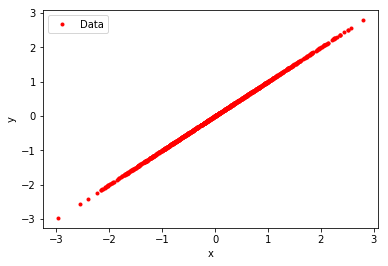

In [2]:
N=1000

x=np.random.normal(0,1,N)

y=x

plt.plot(x,y,'r.',label='Data')
plt.legend()
ax = plt.gca()
ax.set_xlabel("x")
ax.set_ylabel("y")
plt.show()

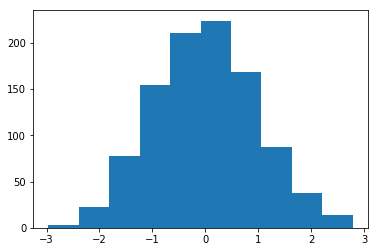

In [3]:
plt.hist(x)
plt.show()

# Problem 1, question b)

In [4]:
corr, _ = pearsonr(x,y)
corr

1.0

# Problem 1, question c)

In [5]:
def infos(x, y, N, B): #N: number of samples (same in x and y), B: number of bins (same in x and y)
    hist = np.histogram2d(x, y, [B,B])[0]
    freqxy = hist.flatten()/N

    hist = np.histogram(x, B)[0]
    freqx = hist/N

    hist = np.histogram(y, B)[0]
    freqy = hist/N
    
    Hx=entropy(freqx, base=2)
    Hy=entropy(freqy, base=2)
    Hxy=entropy(freqxy, base=2)
    
    Ixy=Hx+Hy-Hxy
    Hxsy=Hxy-Hy
    Hysx=Hxy-Hx

    return [Hx,Hy,Hxy,Ixy,Hxsy,Hysx]

# Problem 1, question d)

In [6]:
B=10
Is=infos(x, y, N, B) #Hx,Hy,Hxy,Ixy,Hxsy,Hysx

In [7]:
Is

[2.8115670465633227,
 2.8115670465633227,
 2.8115670465633222,
 2.811567046563323,
 -4.440892098500626e-16,
 -4.440892098500626e-16]

In [8]:
Is[3]+Is[4]-Is[0] #Ixy+Hxsy-Hx

0.0

# Problem 1, question e)

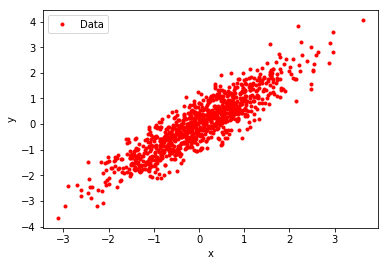

In [9]:
N=1000

x=np.random.normal(0,1,N)

y=x+np.random.normal(0,0.5,N)

plt.plot(x,y,'r.',label='Data')
plt.legend()
ax = plt.gca()
ax.set_xlabel("x")
ax.set_ylabel("y")
plt.show()

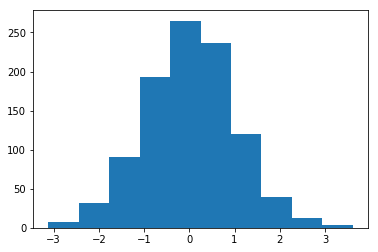

In [10]:
plt.hist(x)
plt.show()

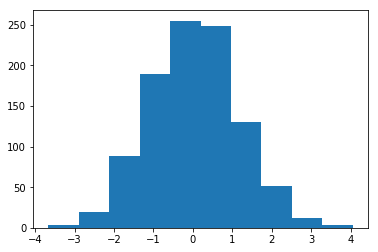

In [11]:
plt.hist(y)
plt.show()

In [12]:
corr, _ = pearsonr(x,y)
corr

0.896000016190974

In [13]:
infos(x, y, N, B) #Hx,Hy,Hxy,Ixy,Hxsy,Hysx

[2.638656753098513,
 2.6091943568636804,
 4.2612473887732225,
 0.9866037211889704,
 1.6520530319095421,
 1.6225906356747095]

# Problem 1, question f)

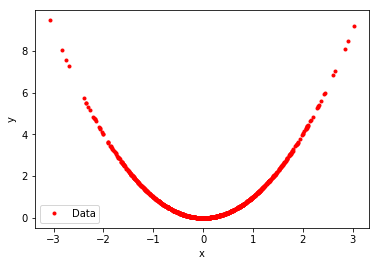

In [14]:
N=1000

x=np.random.normal(0,1,N)

y=x**2

plt.plot(x,y,'r.',label='Data')
plt.legend()
ax = plt.gca()
ax.set_xlabel("x")
ax.set_ylabel("y")
plt.show()

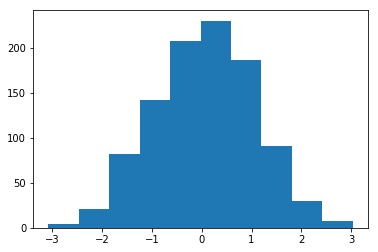

In [15]:
plt.hist(x)
plt.show()

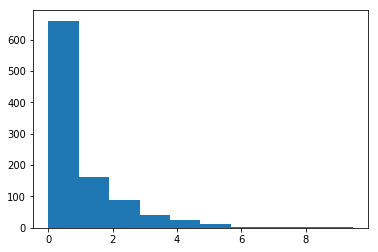

In [16]:
plt.hist(y)
plt.show()

In [17]:
corr, _ = pearsonr(x,y)
corr

0.068888310940155

In [18]:
infos(x, y, N, B) #Hx,Hy,Hxy,Ixy,Hxsy,Hysx

[2.770596698068985,
 1.6282405784057672,
 3.4164496975248464,
 0.9823875789499064,
 1.7882091191190792,
 0.6458529994558613]

# Problem 1, question g)

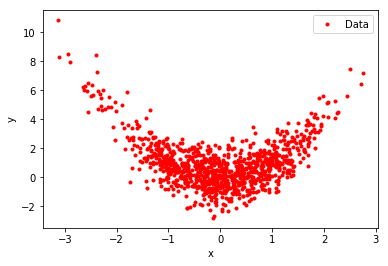

In [19]:
N=1000

x=np.random.normal(0,1,N)

y=x**2+np.random.normal(0,1,N)

plt.plot(x,y,'r.',label='Data')
plt.legend()
ax = plt.gca()
ax.set_xlabel("x")
ax.set_ylabel("y")
plt.show()

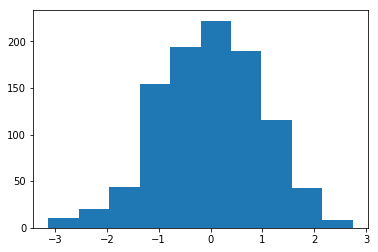

In [20]:
plt.hist(x)
plt.show()

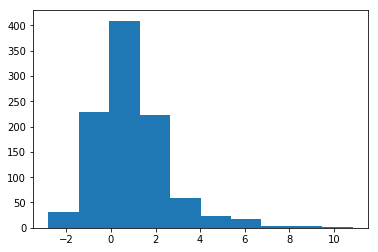

In [21]:
plt.hist(y)
plt.show()

In [22]:
corr, _ = pearsonr(x,y)
corr

-0.11293747102320992

In [23]:
infos(x, y, N, 10) #Hx,Hy,Hxy,Ixy,Hxsy,Hysx

[2.7999639115496127,
 2.196130035171846,
 4.509489365449915,
 0.4866045812715436,
 2.313359330278069,
 1.7095254539003024]

# Problem 2, question a)

In [24]:
seqarray=np.load('Data9.npy')

In [25]:
seqarray

array([[ 0, 15, 17, ..., 15, 18,  9],
       [ 0, 14,  9, ..., 15, 11,  0],
       [ 0, 15,  9, ..., 15, 18,  9],
       ...,
       [ 0,  0,  9, ..., 15,  8, 15],
       [16, 14, 15, ...,  7,  0,  0],
       [ 0,  0,  9, ..., 15,  8, 15]], dtype=int8)

In [26]:
np.max(seqarray)

20

In [27]:
np.min(seqarray)

0

# Problem 2, question b)

In [28]:
entropiesHK=np.zeros(64)
entropiesRR=np.zeros(112)
Hxy=np.zeros((64,112))
for i in range(64): #loop over columns in HK
    hist= np.histogram(seqarray[:,i], bins=range(22))[0]
    entropiesHK[i]=entropy(hist/len(seqarray), base=2)
    for j in range(64,len(seqarray[0])): #loop over columns in RR
        hist= np.histogram(seqarray[:,j], bins=range(22))[0]
        entropiesRR[j-64]=entropy(hist/len(seqarray), base=2)
        hist = np.histogram2d(seqarray[:,i], seqarray[:,j], bins=[range(22),range(22)])[0]
        aux = hist/len(seqarray)
        Hxy[i,j-64]=entropy(aux.flatten(), base=2)

# Problem 2, question c)

In [29]:
Ixy=np.zeros((64,112))
for i in range(64): #loop over columns in HK
    for j in range(64,len(seqarray[0])): #loop over columns in RR
        Ixy[i,j-64]=entropiesHK[i]+entropiesRR[j-64]-Hxy[i,j-64]# Ixy=Hx+Hy-Hxy

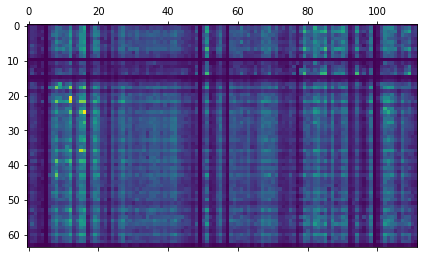

In [30]:
plt.matshow(Ixy);
plt.show()

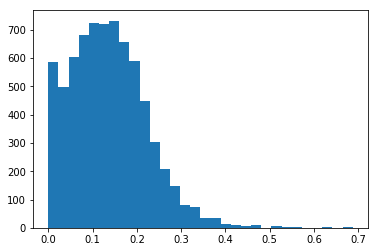

In [31]:
plt.hist(Ixy.flatten(),30)
plt.show()

# Problem 2, question d)

In [32]:
0.35/np.log(2)

0.5049432643111372

In [58]:
cutInd=len(Ixy[Ixy>0.35/np.log(2)])
cutInd

14

In [59]:
listInd = np.unravel_index(np.argsort(-Ixy, axis=None), Ixy.shape) #minus to get them sorted from highest to lowest
xHighMI=listInd[0][range(cutInd)]
yHighMI=listInd[1][range(cutInd)]+64

In [60]:
sortedIxy=Ixy[listInd]
HighMI=sortedIxy[range(cutInd)]

# Problem 2, question e)

In [61]:
contacts=np.load('Data9b.npy')

In [62]:
matr=np.zeros((63,111))
for i in range(len(contacts)):
    matr[contacts[i][0]][contacts[i][1]-64]=1

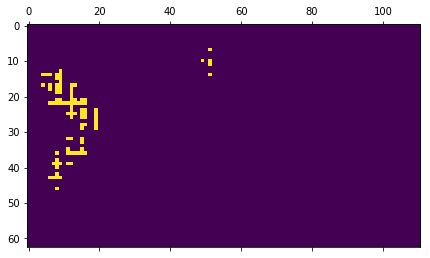

In [63]:
plt.matshow(matr);
plt.show()

# Problem 2, question f)

In [64]:
for i in range(cutInd):
    print((contacts == (xHighMI[i], yHighMI[i])).all(axis=1).nonzero()[0].size)

1
1
1
1
1
1
1
1
1
1
1
1
1
0


# Problem 2, question g)

In [67]:
np.unique(xHighMI)

array([18, 21, 22, 25, 36, 39, 43])